In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [42]:
df = pd.read_excel('NEWAug-2017-Aug-2019.xlsx', engine = 'openpyxl', nrows = 5000)

In [43]:
df.head()

,INCIDENT_NUMBER,DESCRIPTION,SERVICE,PRIORITY,MASTER_INCIDENT_NUMBER,REPORTED_DATE_GMT,OPERATIONAL_CATEGORY_TIER_1,ASSIGNED_SUPPORT_GROUP,LAST_SOLVED_DATE_GMT,DETAILED_DECRIPTION,RESOLUTION
0,INC000016479136,Aftermarket Application,AANA-RP-RMV,Low,NaN,19-JUL-19,Failure,Distribution Warehouse Management - RBEI,22-JUL-19,CAL1/120/Simple/Data_Base_Issue\nProblem - DLx...,D - Released work is going into work assignmen...
1,INC000016480371,Power Tools DLx,PTNA-RP-WEM,Low,NaN,19-JUL-19,Failure,Distribution Warehouse Management - RBEI,22-JUL-19,CAL1/120/Simple/Manifest\nProblem with DLx - O...,D - 0113776884 1 box for order manifested and ...
2,INC000016480382,Aftermarket Application,AANA-RP-RMV,Low,NaN,19-JUL-19,Failure,Distribution Warehouse Management - RBEI,22-JUL-19,CAL1/120/Simple/Shipping\nProblem - DLx/WMS AA...,D - Order number 495114 throws an error messag...
3,INC000016480392,Aftermarket Application,AANA-RP-ATL,Low,NaN,19-JUL-19,Failure,Distribution Warehouse Management - RBEI,22-JUL-19,DUA1/180/Simple/WO\nProblem - DLx/WMS POD C - ...,D- Problem - DLx/WMS POD C - Order # 1578209 w...
4,INC000016489059,UC4-Failure; EUP7-1401: Job-Failure 1915068588...,PRA-SALES-AND-DISTRIBUTION,Low,NaN,22-JUL-19,Failure,SD - EXT RBEI,22-JUL-19,HMB2/90/Simple\nFor Recovery actions please ra...,P: Job DC_US10_SD10148_RBR1_A_PPIF_DOCU failed...


In [44]:
df.shape

(5000, 11)

# Considering the input feature (DETAILED_DECRIPTION)

# Data Cleaning:

1) Detect which language it is and make the separate dataframe for each language
2) Remove the puncutiation marks, numbers ..etc
3) Make the Lower case
4) Remove the stop words
5) Lemittization
6) Find a way to convert text data to numeric data

In [45]:
# Eg 1:
from langdetect import detect
detect("War doesn't show who's right, just who's left.")

'en'

In [46]:
detect("Ein, zwei, drei, vier")

'de'

In [47]:
df['Language'] = df['DETAILED_DECRIPTION'].apply(lambda x: detect(x))

In [48]:
df['Language'].value_counts()

en    4284
de     622
pt      65
es       8
it       6
cs       4
fr       4
hu       3
ja       2
sv       1
vi       1
Name: Language, dtype: int64

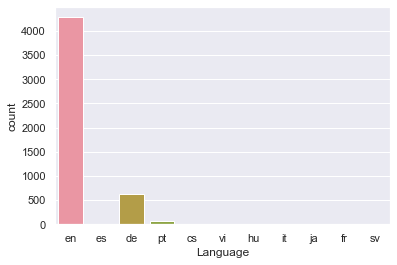

In [49]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Language", data=df)

In [50]:
df_en = df.loc[df.Language == 'en', :]
df_de = df.loc[df.Language == 'de', :]
df_pt = df.loc[df.Language == 'pt', :]

In [51]:
# Reseting the index
df_en.reset_index(inplace = True, drop=True)
df_de.reset_index(inplace = True, drop=True)
df_pt.reset_index(inplace = True, drop=True)

In [52]:
df_en.head()

,INCIDENT_NUMBER,DESCRIPTION,SERVICE,PRIORITY,MASTER_INCIDENT_NUMBER,REPORTED_DATE_GMT,OPERATIONAL_CATEGORY_TIER_1,ASSIGNED_SUPPORT_GROUP,LAST_SOLVED_DATE_GMT,DETAILED_DECRIPTION,RESOLUTION,Language
0,INC000016479136,Aftermarket Application,AANA-RP-RMV,Low,NaN,19-JUL-19,Failure,Distribution Warehouse Management - RBEI,22-JUL-19,CAL1/120/Simple/Data_Base_Issue\nProblem - DLx...,D - Released work is going into work assignmen...,en
1,INC000016480371,Power Tools DLx,PTNA-RP-WEM,Low,NaN,19-JUL-19,Failure,Distribution Warehouse Management - RBEI,22-JUL-19,CAL1/120/Simple/Manifest\nProblem with DLx - O...,D - 0113776884 1 box for order manifested and ...,en
2,INC000016480382,Aftermarket Application,AANA-RP-RMV,Low,NaN,19-JUL-19,Failure,Distribution Warehouse Management - RBEI,22-JUL-19,CAL1/120/Simple/Shipping\nProblem - DLx/WMS AA...,D - Order number 495114 throws an error messag...,en
3,INC000016480392,Aftermarket Application,AANA-RP-ATL,Low,NaN,19-JUL-19,Failure,Distribution Warehouse Management - RBEI,22-JUL-19,DUA1/180/Simple/WO\nProblem - DLx/WMS POD C - ...,D- Problem - DLx/WMS POD C - Order # 1578209 w...,en
4,INC000016489059,UC4-Failure; EUP7-1401: Job-Failure 1915068588...,PRA-SALES-AND-DISTRIBUTION,Low,NaN,22-JUL-19,Failure,SD - EXT RBEI,22-JUL-19,HMB2/90/Simple\nFor Recovery actions please ra...,P: Job DC_US10_SD10148_RBR1_A_PPIF_DOCU failed...,en


In [53]:
df_en['DETAILED_DECRIPTION'][1]

'CAL1/120/Simple/Manifest\nProblem with DLx - OTHER - INDICATE BELOW, Description: 0113776884 1 box for order manifested and the rest have and error message.  Invalid package count or invalid sequence number.'

In [54]:
# Here the situation is we need to rplace the punctuation and with space (because if we only remove the puncuation then some words will be mixed)

In [55]:
# eg: code
k = "CAL1/120/Simple/Manifest Problem with DLx - OTHER - INDICATE BELOW, Description: 0113776884 1 box for order manifested and the rest have and error message.  Invalid package count or invalid sequence number."

import string
def remove_punct(text):
    for i in string.punctuation:
        text = text.replace(i,' ')
    return text
remove_punct(k)

'CAL1 120 Simple Manifest Problem with DLx   OTHER   INDICATE BELOW  Description  0113776884 1 box for order manifested and the rest have and error message   Invalid package count or invalid sequence number '

In [56]:
df_en['DETAILED_DECRIPTION'] = df_en['DETAILED_DECRIPTION'].apply(lambda x: ''.join(remove_punct(x)))

<ipython-input-56-5952b60e10f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['DETAILED_DECRIPTION'] = df_en['DETAILED_DECRIPTION'].apply(lambda x: ''.join(remove_punct(x)))


In [57]:
df_en['DETAILED_DECRIPTION'][1]

'CAL1 120 Simple Manifest\nProblem with DLx   OTHER   INDICATE BELOW  Description  0113776884 1 box for order manifested and the rest have and error message   Invalid package count or invalid sequence number '

In [176]:
# making it as lower case
df_en["DETAILED_DECRIPTION"] = df_en["DETAILED_DECRIPTION"].apply(lambda x: x.lower())

<ipython-input-176-4266a659c915>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en["DETAILED_DECRIPTION"] = df_en["DETAILED_DECRIPTION"].apply(lambda x: x.lower())


In [59]:
df_en['DETAILED_DECRIPTION'][1]

'cal1 120 simple manifest\nproblem with dlx   other   indicate below  description  0113776884 1 box for order manifested and the rest have and error message   invalid package count or invalid sequence number '

In [60]:
#### Removing the stop words
from spacy.lang.en.stop_words import STOP_WORDS

df_en["DETAILED_DECRIPTION"] = df_en["DETAILED_DECRIPTION"].apply(lambda x: ' '.join([i for i in x.split() if i not in STOP_WORDS]))

<ipython-input-60-3dec28e126ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en["DETAILED_DECRIPTION"] = df_en["DETAILED_DECRIPTION"].apply(lambda x: ' '.join([i for i in x.split() if i not in STOP_WORDS]))


In [61]:
df_en['DETAILED_DECRIPTION'][1]

'cal1 120 simple manifest problem dlx indicate description 0113776884 1 box order manifested rest error message invalid package count invalid sequence number'

In [62]:
# Removing the numbers

df_en['DETAILED_DECRIPTION'] = df_en['DETAILED_DECRIPTION'].apply(lambda x: ''.join([i for i in x if i not in string.digits]))

<ipython-input-62-229010da389c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['DETAILED_DECRIPTION'] = df_en['DETAILED_DECRIPTION'].apply(lambda x: ''.join([i for i in x if i not in string.digits]))


In [63]:
df_en['DETAILED_DECRIPTION'][1]

'cal  simple manifest problem dlx indicate description   box order manifested rest error message invalid package count invalid sequence number'

In [64]:
df_en['DETAILED_DECRIPTION'][4]

'hmb  simple recovery actions raise run request armt https rb armt bosch com jrm sap system pra  sap jobname dc us sd rbr ppif docu uc jobname dc us sd rbr ppif document appifus uc run nr  uc jobplan dc us sd pra  rbr ppif document appifus customer mentioned jobplan documentation angel michio allier sanchez date time msgid nr message         job started         step  started program rbr ppif document variant uc appifus user id uccpic         internal session terminated runtime error sapsql select dbtab changed st         job cancelled               step  program rbr ppif document spoolnumber         step selection screen'

In [65]:
df_en['DETAILED_DECRIPTION'][0]

'cal  simple data base issue problem dlx wms aa jda released work going work assignment allowing pick orders attachment'

In [66]:
# Doing Lemmitization

import spacy
en_core = spacy.load('en_core_web_sm')

df_en['NEW_DETAILED_DECRIPTION'] = df_en['DETAILED_DECRIPTION'].apply(lambda x : " ".join([y.lemma_ for y in en_core(x)]))

<ipython-input-66-d3b502af6e65>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['NEW_DETAILED_DECRIPTION'] = df_en['DETAILED_DECRIPTION'].apply(lambda x : " ".join([y.lemma_ for y in en_core(x)]))


In [67]:
df_en['NEW_DETAILED_DECRIPTION'][0]

'cal   simple data base issue problem dlx wms aa jda release work go work assignment allow pick order attachment'

In [80]:
import nltk
words = set(nltk.corpus.words.words())

var = df_en.loc[:, "NEW_DETAILED_DECRIPTION"]

for i in range(len(var)):
    df_en["NEW_NEW_DETAILED_DECRIPTION"][i] = " ".join(w for w in nltk.wordpunct_tokenize(var[i]) if w.lower() in words or not w.isalpha())


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [83]:
df_en["NEW_NEW_DETAILED_DECRIPTION"]

0       cal simple data base issue problem aa release ...
1       cal simple manifest problem indicate descripti...
2       cal simple shipping problem aa order number th...
3       simple wo problem pod c order book part system...
4       simple recovery action raise run request bosch...
                              ...                        
4279    initiator script define vis view raster d datu...
4280    vendor n na na request transfer ticket system ...
4281    vas e e v v na answer question q user i d e g ...
4282    poe delivery find shipment specific user n req...
4283    simple po approval po approval error hello use...
Name: NEW_NEW_DETAILED_DECRIPTION, Length: 4284, dtype: object

#### Analysing the target column

In [87]:
df_en['ASSIGNED_SUPPORT_GROUP'].value_counts()

Procurement - RBEI                            856
SD - RBEI                                     295
Mechanics                                     212
Procurement – RBEI – EXT                      193
Accounting Financials - RBEI                  189
                                             ... 
Logistics DC                                    1
Time to Market - PDM/PLM - EXT                  1
CI/BMB-NA Business Intelligence                 1
Purchasing and Procurement - RBEI L3 - EXT      1
Manufacturing and Logistics I4.0 - RBEI         1
Name: ASSIGNED_SUPPORT_GROUP, Length: 108, dtype: int64

<AxesSubplot:>

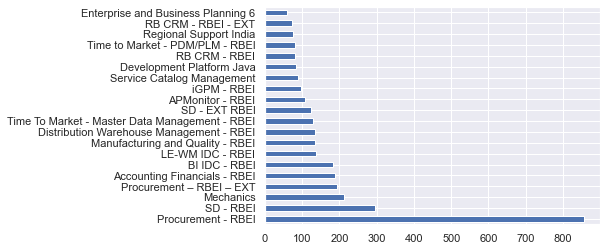

In [88]:
df_en['ASSIGNED_SUPPORT_GROUP'].value_counts()[:20].plot(kind = 'barh')

#### TFIDF-Vectorization

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features = 2500)
tfidf_vectors = vec.fit_transform(df_en['NEW_NEW_DETAILED_DECRIPTION'])

In [112]:
tfidf_vectors

<4284x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 214262 stored elements in Compressed Sparse Row format>

In [113]:
df_en['NEW_NEW_DETAILED_DECRIPTION'].tail(20)

4264    new new new po approval po approval error hell...
4265    dear team report long run show secure connecti...
4266    simple sale order issue sap p flux de facture ...
4267    opening spray configuration follow warning rep...
4268    gen simple po approval po approval error reque...
4269    simple job failure hello team job ae rep ae p ...
4270    simple system operation asynchronous system be...
4271    pry unable open file project management q modu...
4272    ray simple approval approval error answer ques...
4273    distribute account na na t het en het van de s...
4274    gaj simple po dear colleague help trigger crea...
4275    simple translate answer information ticket q s...
4276    material trigger tango n na n answer question ...
4277    simple approval handle request transfer ticket...
4278    q call q error message display possible add " ...
4279    initiator script define vis view raster d datu...
4280    vendor n na na request transfer ticket system ...
4281    vas e 

In [114]:
new_df = pd.DataFrame(tfidf_vectors.toarray(), columns = vec.get_feature_names())
new_df.head()

,aa,able,abnormal,abnormally,abort,abortion,about,absence,absolutely,acceder,...,yo,you,yuan,za,zebra,zee,zero,zip,zipper,zone
0,0.207324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.177382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
var = df_en['ASSIGNED_SUPPORT_GROUP'].value_counts()
print(var)

Procurement - RBEI                            856
SD - RBEI                                     295
Mechanics                                     212
Procurement – RBEI – EXT                      193
Accounting Financials - RBEI                  189
                                             ... 
Logistics DC                                    1
Time to Market - PDM/PLM - EXT                  1
CI/BMB-NA Business Intelligence                 1
Purchasing and Procurement - RBEI L3 - EXT      1
Manufacturing and Logistics I4.0 - RBEI         1
Name: ASSIGNED_SUPPORT_GROUP, Length: 108, dtype: int64


In [93]:
lst = []
count = 0
for i in var.index:
    if var[i] <= 50:
        count = count + 1
        lst.append(i)
    else:
        pass
print(lst)

['Accounting Financials - RBEI - EXT', 'Extranet & Internet - RBEI', 'Accounting Controlling - RBEI', 'Purchasing and Procurement - RBEI L3', 'Manufacturing and Quality - RBEI - EXT', 'Sales - Order Entry', 'Logistics Planning - EXT - RBEI', 'Electronics', 'IDC Application Mgmt Authorization, Compliance, Usermgmt', 'Time to Market - Product Lifecycle and Product Data Mgmt', 'Human Resources - Personnel Management', 'Purchasing Umbrella', 'Accounting Financial Services - RBEI', 'Manufacturing and Quality', 'iGPM - RBEI - EXT', 'Logistics Planning - RBEI', 'RB CRM FI SSF - RBEI', 'BI BO Platform support - RBEI', 'APEX 2nd Level - RBEI - EXT', 'BI Platform Management', 'Human Resources - RBMX - NA', 'RB CRM HR SSF -  RBEI', 'Accounting Controlling - RBEI - EXT', 'Time to Market - Master Data Management', 'Procurement and Production Logistics, Warehouse Management', 'Time to Market - Project Management', 'iGPM Program', 'Logistics Planning', 'QM - EXT iPoint', 'Human Resources - Personnel 

In [94]:
for i in df_en.loc[:, "ASSIGNED_SUPPORT_GROUP"]:
    if i in lst:
        df_en['ASSIGNED_SUPPORT_GROUP'].replace(to_replace = i, value = 'OTHERS', inplace=True)

c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [95]:
df_en['ASSIGNED_SUPPORT_GROUP'].value_counts()

Procurement - RBEI                                            856
OTHERS                                                        844
SD - RBEI                                                     295
Mechanics                                                     212
Procurement – RBEI – EXT                                      193
Accounting Financials - RBEI                                  189
BI IDC - RBEI                                                 182
LE-WM IDC - RBEI                                              137
Distribution Warehouse Management - RBEI                      134
Manufacturing and Quality - RBEI                              134
Time To Market - Master Data Management - RBEI                130
SD - EXT RBEI                                                 124
APMonitor - RBEI                                              107
iGPM - RBEI                                                    96
Service Catalog Management                                     88
Developmen

#### Mapping all targets values to numbers

In [116]:
# taking keys in a list and values in a range of length of nunique

keys = list(df_en['ASSIGNED_SUPPORT_GROUP'].unique())
values = range(df_en['ASSIGNED_SUPPORT_GROUP'].nunique())

In [117]:
dict_map = dict(zip(keys, values))
print(dict_map)

{'Distribution Warehouse Management - RBEI': 0, 'SD - EXT RBEI': 1, 'OTHERS': 2, 'Manufacturing and Quality - RBEI': 3, 'Accounting Financials - RBEI': 4, 'BI IDC - RBEI': 5, 'Mechanics': 6, 'SD - RBEI': 7, 'Service Catalog Management': 8, 'Procurement - RBEI': 9, 'iGPM - RBEI': 10, 'Time to Market - PDM/PLM - RBEI': 11, 'Procurement – RBEI – EXT': 12, 'Enterprise and Business Planning 6': 13, 'APMonitor - RBEI': 14, 'Regional Support India': 15, 'Time to Market - Project Management - RBEI': 16, 'Time To Market - Master Data Management - RBEI': 17, 'IT Infrastructure Monitoring, Reporting, Metrics worldwide': 18, 'LE-WM IDC - RBEI': 19, 'RB CRM - RBEI - EXT': 20, 'RB CRM - RBEI': 21, 'Development Platform Java': 22}


In [118]:
# Mapping these 0,1,2 .....153  to the 'ASSIGNED_SUPPORT_GROUP' column

df_en['NEW_ASSIGNED_SUPPORT_GROUP'] = df_en['ASSIGNED_SUPPORT_GROUP'].map(dict_map)

<ipython-input-118-0cc175a5ad9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['NEW_ASSIGNED_SUPPORT_GROUP'] = df_en['ASSIGNED_SUPPORT_GROUP'].map(dict_map)


In [119]:
df_en['NEW_ASSIGNED_SUPPORT_GROUP']

0        0
1        0
2        0
3        0
4        1
        ..
4279     6
4280    17
4281     2
4282     7
4283     9
Name: NEW_ASSIGNED_SUPPORT_GROUP, Length: 4284, dtype: int64

In [121]:
X = new_df
y = df_en['NEW_ASSIGNED_SUPPORT_GROUP']

In [122]:
#### Since the output is imbalanced we need to convert to the balanced data
#### Oversampling using smotetomek

from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 42)

In [124]:
X_res, y_res = smk.fit_resample(X, y)

In [127]:
from collections import Counter

print("Original Dataset Shape {}".format(Counter(y)))
print("Resampled Dataset Shape {}".format(Counter(y_res)))

Original Dataset Shape Counter({9: 856, 2: 844, 7: 295, 6: 212, 12: 193, 4: 189, 5: 182, 19: 137, 0: 134, 3: 134, 17: 130, 1: 124, 14: 107, 10: 96, 8: 88, 22: 84, 21: 81, 11: 80, 15: 74, 20: 72, 13: 60, 16: 58, 18: 54})
Resampled Dataset Shape Counter({0: 856, 1: 856, 3: 856, 4: 856, 5: 856, 6: 856, 7: 856, 8: 856, 10: 856, 11: 856, 13: 856, 14: 856, 15: 856, 16: 856, 17: 856, 18: 856, 20: 856, 21: 856, 22: 856, 19: 855, 12: 854, 2: 851, 9: 848})


In [128]:
X_res.shape

(19672, 2500)

In [129]:
type(X_res)

pandas.core.frame.DataFrame

## Train Test Split

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2)

# logistic reegression

In [131]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 200)
log_model = log.fit(X_train, y_train)

In [132]:
y_pred = log_model.predict(X_test)

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.8889453621346887


# knn classifier

In [133]:
#First we take k value 1 then we check the model then in the below we can understand how to select k value

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors is the k value
knn_model = knn.fit(X_train, y_train)

In [134]:
y_pred = knn_model.predict(X_test)

In [135]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.9445997458703939


In [136]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

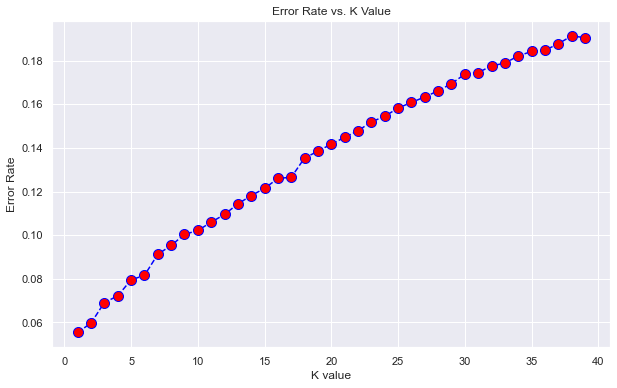

In [137]:
plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

# Naive Bayes - GaussianNB

In [138]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [139]:
y_pred = nb_model.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

0.89428208386277


# Naive Bayes MultinomialNB

In [141]:
from sklearn.naive_bayes import MultinomialNB
nb_model1 = MultinomialNB()
nb_model1.fit(X_train, y_train)


MultinomialNB()

In [142]:
y_pred_m = nb_model1.predict(X_test)

from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_pred_m, y_test)
print(score1)

0.7382465057179162


# svm(RBF)

In [144]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
svm_model = classifier.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [145]:
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_pred, y_test)
print(score1)


0.947141041931385


# Decision Trees

In [147]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)

In [148]:
y_pred = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score
dt_score = accuracy_score(y_pred, y_test)
print(dt_score)

0.9067344345616264


# Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model = rf.fit(X_train, y_train)

In [150]:
y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score
dt_score = accuracy_score(y_pred, y_test)
print(dt_score)

0.9367217280813215


# Ada Boost

In [151]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab_model = rf.fit(X_train, y_train)

In [152]:
y_pred = ab_model.predict(X_test)

from sklearn.metrics import accuracy_score
dt_score = accuracy_score(y_pred, y_test)
print(dt_score)

0.9367217280813215


# XG-Boost

In [153]:
import xgboost
xg = xgboost.XGBClassifier()
xgboost_model = xg.fit(X_train, y_train)

c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [154]:
y_pred = ab_model.predict(X_test)

from sklearn.metrics import accuracy_score
dt_score = accuracy_score(y_pred, y_test)
print(dt_score)

0.9367217280813215


# XG-Boost By Hyper-Parameter Tuning

In [162]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [163]:
classifier = xgboost.XGBClassifier()

In [164]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [167]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring='roc_auc', cv=3, verbose=3)

In [168]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:46:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 1/3] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=nan total time= 5.5min
[23:52:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 2/3] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=nan total time= 5.8min
[23:57:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 3/3] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=7;, score=nan total time= 5.8min
[00:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 1/3] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=nan total time= 1.9min
[00:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 2/3] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=nan total time= 1.9min
[00:07:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 3/3] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=5;, score=nan total time= 1.9min
[00:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 1/3] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=nan total time= 5.4min
[00:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 2/3] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=nan total time= 5.2min
[00:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 3/3] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1;, score=nan total time= 5.0min
[00:25:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 1/3] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=nan total time= 2.9min
[00:27:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 2/3] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=nan total time= 2.9min
[00:30:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 3/3] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=3;, score=nan total time= 2.9min
[00:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 1/3] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=nan total time= 2.6min
[00:36:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label enc

[CV 2/3] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=nan total time= 2.9min
[00:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
  File "c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 328, in _score
    if sample_weight is not None:
ValueError: multiclass format is not supported

  pre_dispatch : int or str, default='2*n_jobs'
c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One o

[CV 3/3] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=5;, score=nan total time= 2.9min
[00:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [169]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [170]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 12,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [171]:
best_classifier_model = xgboost.XGBClassifier()

In [173]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,X,y,cv=3)

c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:11:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\lokes\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:13:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [174]:
score

array([0.64985994, 0.65896359, 0.63305322])

In [175]:
score.mean()

0.6472922502334267